<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%20tap%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install scikit-fuzzy

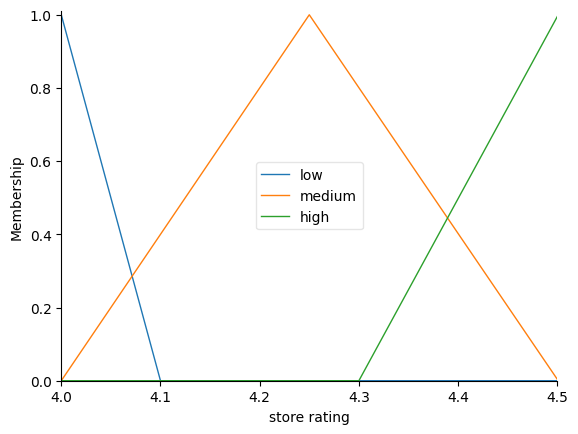

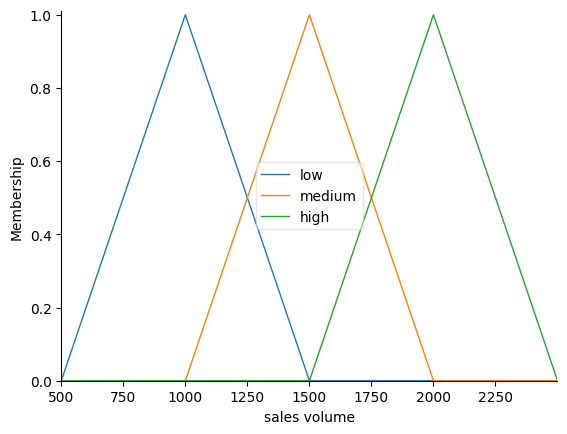

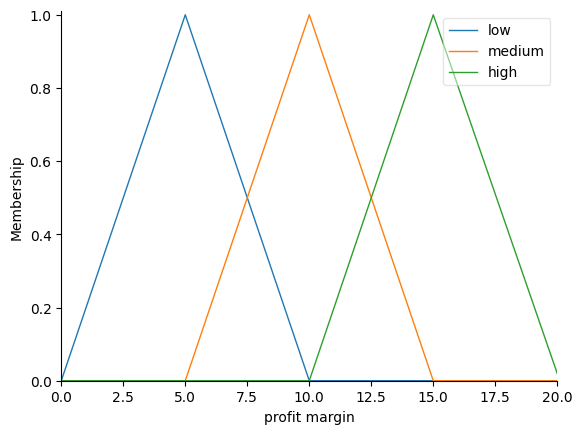

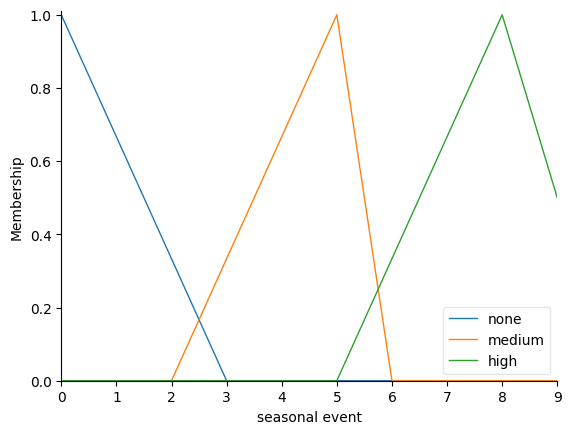

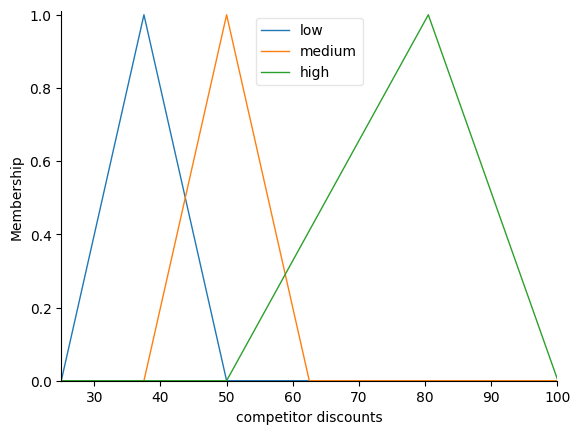

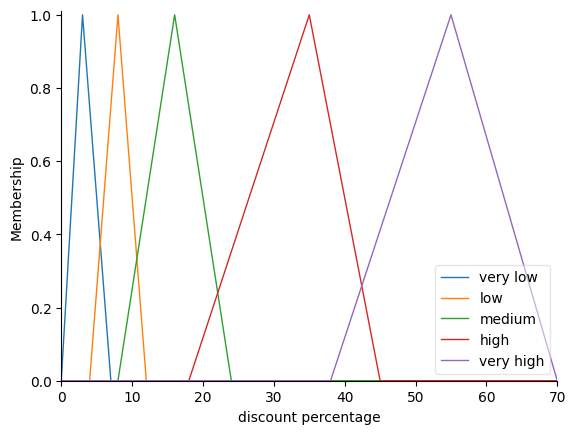

In [46]:
#exam 2


import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



store_rating=ctrl.Antecedent(np.arange(4,4.51,0.01),'store rating')
sales_volume=ctrl.Antecedent(np.arange(500,2500,1),'sales volume')
profit_margin=ctrl.Antecedent(np.arange(0,20.1,0.1),'profit margin')
seasonal_event=ctrl.Antecedent(np.arange(0,10,1),'seasonal event')
competitor_discounts=ctrl.Antecedent(np.arange(25,100.1,0.1),'competitor discounts')
discount_percentage=ctrl.Consequent(np.arange(0,70.1,0.1),'discount percentage')


store_rating['low']=fuzz.trimf(store_rating.universe,[4,4,4.1])
store_rating['medium']=fuzz.trimf(store_rating.universe,[4,4.25,4.501])
store_rating['high']=fuzz.trimf(store_rating.universe,[4.3,4.501,4.501])
sales_volume['low']=fuzz.trimf(sales_volume.universe,[500,1000,1500])
sales_volume['medium']=fuzz.trimf(sales_volume.universe,[1000,1500,2000])
sales_volume['high']=fuzz.trimf(sales_volume.universe,[1500,2000,2500])
profit_margin['low']=fuzz.trimf(profit_margin.universe,[0,5,10])
profit_margin['medium']=fuzz.trimf(profit_margin.universe,[5,10,15])
profit_margin['high']=fuzz.trimf(profit_margin.universe,[10,15,20.1])
seasonal_event['none']=fuzz.trimf(seasonal_event.universe,[0,0,3])
seasonal_event['medium']=fuzz.trimf(seasonal_event.universe,[2,5,6])
seasonal_event['high']=fuzz.trimf(seasonal_event.universe,[5,8,10])
competitor_discounts['low']=fuzz.trimf(competitor_discounts.universe,[25,37.5,50])
competitor_discounts['medium']=fuzz.trimf(competitor_discounts.universe,[37.5,50,62.5])
competitor_discounts['high']=fuzz.trimf(competitor_discounts.universe,[50,80.5,100.1])
discount_percentage['very low']=fuzz.trimf(discount_percentage.universe,[0,3,7])
discount_percentage['low']=fuzz.trimf(discount_percentage.universe,[4,8,12])
discount_percentage['medium']=fuzz.trimf(discount_percentage.universe,[8,16,24])
discount_percentage['high']=fuzz.trimf(discount_percentage.universe,[18,35,45])
discount_percentage['very high']=fuzz.trimf(discount_percentage.universe,[38,55,70])


store_rating.view()
sales_volume.view()
profit_margin.view()
seasonal_event.view()
competitor_discounts.view()
discount_percentage.view()


dict_keys(['discount percentage'])
54.231208257437665


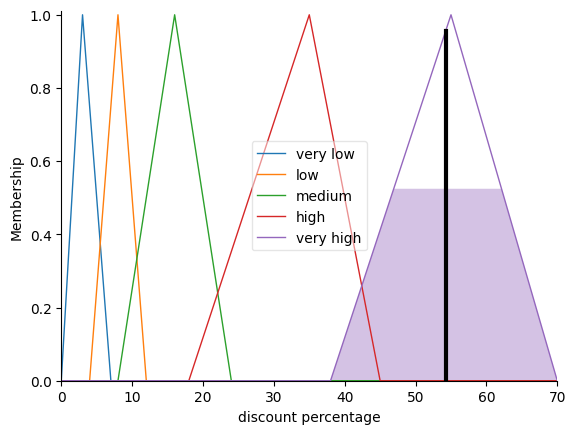

In [47]:
rule1=ctrl.Rule(store_rating['high']&sales_volume['high']&profit_margin['high'],discount_percentage['very low'])
rule2=ctrl.Rule(store_rating['low']&sales_volume['low']&profit_margin['high'],discount_percentage['high'])
rule3=ctrl.Rule(seasonal_event['high']&competitor_discounts['high'],discount_percentage['very high'])
rule4=ctrl.Rule(store_rating['medium']&sales_volume['medium']&profit_margin['medium'],discount_percentage['medium'])
rule5=ctrl.Rule(competitor_discounts['low']&profit_margin['low']&sales_volume['high'],discount_percentage['very low'])
rule6=ctrl.Rule(store_rating['low']&seasonal_event['none'],discount_percentage['medium'])
rule7=ctrl.Rule(sales_volume['low']&profit_margin['low'],discount_percentage['very high'])


discount_percentage_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
discount_percentage_simulation=ctrl.ControlSystemSimulation(discount_percentage_ctrl)
discount_percentage_simulation.input['store rating']=4.3
discount_percentage_simulation.input['sales volume']=1400
discount_percentage_simulation.input['profit margin']=3
discount_percentage_simulation.input['seasonal event']=7
discount_percentage_simulation.input['competitor discounts']=66
discount_percentage_simulation.compute()
print(discount_percentage_simulation.output.keys())
print(discount_percentage_simulation.output['discount percentage'])

discount_percentage.view(sim=discount_percentage_simulation)